In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from math import sqrt

from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#from keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [90]:
currency_list = ['USDCHF10080',
                 #'GBPUSD10080', 'EURUSD10080', 'USDJPY10080', 'USDCAD10080', 'AUDUSD10080', 'NZDUSD10080',
                 #'GBPCHF10080', 'EURCHF10080', 'CHFJPY10080', 'CADCHF10080', 'AUDCHF10080', 'NZDCHF10080', 'EURGBP10080',
                 #'GBPJPY10080', 'GBPCAD10080', 'GBPAUD10080', 'EURJPY10080', 'EURCAD10080', 'EURAUD10080', 'EURNZD10080',
                #'CADJPY10080', 'AUDJPY10080', 'NZDJPY10080', 'AUDCAD10080', 'NZDCAD10080', 'AUDNZD10080'
                ]



# for q in currency_list:
    
#     errors = []
    
#     for x in range(5):

#         currency = q.replace('10080','')

#         data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
#         #data = data.head(695)


#         X = data.drop(columns=['Unnamed: 0', 
#                                'date_start',  'nextweek_class',


#                               ])



#         y = data['nextweek_class']

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )



#         lnr= LinearRegression()
#         lnr.fit(X_train, y_train)
#         y_predict = lnr.predict(X_test)
        
        
#         error = sqrt(mean_squared_error(y_test, y_pred))
#         errors.append(error)
       
        
#     average_error = sum(errors)/len(errors)
       
#     print(q + " Linear regression Average " + str(average_error))
    
    
   


In [91]:
for q in currency_list:
    
    errors = []
    
    for x in range(1):

        currency = q.replace('10080','')

        data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
        #data = data.head(695)


        X = data.drop(columns=['Unnamed: 0', 
                               'date_start',  'nextweek_class',


                              ])



        y = data['nextweek_class']
      
    
        

        #print(X.shape)
        
        
        # after scaling the df, resulted in "scaled_dataset"
        sequences = 3
        result = []
        # for loop will walk for each of the 1500 rows
        for i in range(0,len(X)):
            # every group must have the same length, so if current loop position i + number 
            # of sequences is higher than df length, breaks
            if i+sequences <= len(X):
                # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
                result.append(X[i:i+sequences].values)
        # Converting to array + keras takes float32 better than 64
        train_x = np.array(result)
        #train_x  = train_x.astype('float32')
        # making the y into same length as X
        train_y = np.array(y.head(len(train_x)).values)

        print(train_x.shape, train_y.shape)
        #print(train_x[len(train_x)-10])
        #print(train_y[len(train_x)-10])
        
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2 )

       
        
       
        #Initializing the classifier Network
        classifier = Sequential()

        #Adding the input LSTM network layer
        #classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
        classifier.add(LSTM(200, input_shape=(train_x.shape[1:]), return_sequences=True))
        classifier.add(LSTM(200, input_shape=(train_x.shape[1:]), return_sequences=True))
        
        classifier.add(LSTM(1,  return_sequences=False))
        #classifier.add(Dropout(0.2))
        #Adding a second LSTM network layer
        
        #classifier.add(LSTM(128))
        #Adding a dense hidden layer
        #classifier.add(Dense(64, activation='relu'))
        #classifier.add(Dropout(0.2))

        #Adding the output layer
        #classifier.add(Dense(35, activation='softmax'))
      
        #Compiling the network
        classifier.compile( loss='mean_absolute_error',
                      optimizer=Adam(learning_rate=0.001, decay=1e-6),
                      metrics=['accuracy'] )
        
        print(classifier.summary())

        #Fitting the data to the model
        history = classifier.fit(X_train,
                 y_train,
                  epochs=500,
                  validation_data=(X_test, y_test))


(3495, 3, 27) (3495,)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 3, 200)            182400    
_________________________________________________________________
lstm_54 (LSTM)               (None, 3, 200)            320800    
_________________________________________________________________
lstm_55 (LSTM)               (None, 1)                 808       
Total params: 504,008
Trainable params: 504,008
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
88/88 [==============================] - 15s 79ms/step - loss: 9.3499 - accuracy: 0.0111 - val_loss: 9.4382 - val_accuracy: 0.0315
Epoch 2/500
88/88 [==============================] - 5s 62ms/step - loss: 9.2897 - accuracy: 0.0415 - val_loss: 9.4348 - val_accuracy: 0.0358
Epoch 3/500
88/88 [==============================] - 5s 61ms/step

Epoch 53/500
88/88 [==============================] - 5s 60ms/step - loss: 8.6066 - accuracy: 0.0415 - val_loss: 9.4466 - val_accuracy: 0.0258
Epoch 54/500
88/88 [==============================] - 5s 61ms/step - loss: 8.5830 - accuracy: 0.0429 - val_loss: 9.4772 - val_accuracy: 0.0315
Epoch 55/500
88/88 [==============================] - 5s 61ms/step - loss: 8.5847 - accuracy: 0.0422 - val_loss: 9.4738 - val_accuracy: 0.0258
Epoch 56/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5880 - accuracy: 0.0404 - val_loss: 9.4739 - val_accuracy: 0.0243
Epoch 57/500
88/88 [==============================] - 5s 61ms/step - loss: 8.5546 - accuracy: 0.0418 - val_loss: 9.4506 - val_accuracy: 0.0258
Epoch 58/500
88/88 [==============================] - 5s 61ms/step - loss: 8.5727 - accuracy: 0.0415 - val_loss: 9.4788 - val_accuracy: 0.0200
Epoch 59/500
88/88 [==============================] - 5s 61ms/step - loss: 8.5804 - accuracy: 0.0411 - val_loss: 9.4665 - val_accuracy: 0.0258

88/88 [==============================] - 5s 62ms/step - loss: 8.4957 - accuracy: 0.0443 - val_loss: 9.4560 - val_accuracy: 0.0272
Epoch 111/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4971 - accuracy: 0.0443 - val_loss: 9.4478 - val_accuracy: 0.0258
Epoch 112/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5557 - accuracy: 0.0429 - val_loss: 9.4734 - val_accuracy: 0.0258
Epoch 113/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5292 - accuracy: 0.0433 - val_loss: 9.4531 - val_accuracy: 0.0200
Epoch 114/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5217 - accuracy: 0.0447 - val_loss: 9.4460 - val_accuracy: 0.0272
Epoch 115/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5116 - accuracy: 0.0447 - val_loss: 9.4477 - val_accuracy: 0.0272
Epoch 116/500
88/88 [==============================] - 5s 62ms/step - loss: 8.5136 - accuracy: 0.0426 - val_loss: 9.4530 - val_accuracy: 0.0258
Epoch 

Epoch 167/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4890 - accuracy: 0.0458 - val_loss: 9.4728 - val_accuracy: 0.0186
Epoch 168/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4801 - accuracy: 0.0454 - val_loss: 9.4438 - val_accuracy: 0.0243
Epoch 169/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4910 - accuracy: 0.0447 - val_loss: 9.4332 - val_accuracy: 0.0286
Epoch 170/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4924 - accuracy: 0.0461 - val_loss: 9.4448 - val_accuracy: 0.0272
Epoch 171/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4947 - accuracy: 0.0447 - val_loss: 9.4547 - val_accuracy: 0.0215
Epoch 172/500
88/88 [==============================] - 6s 68ms/step - loss: 8.4811 - accuracy: 0.0443 - val_loss: 9.4516 - val_accuracy: 0.0229
Epoch 173/500
88/88 [==============================] - 6s 63ms/step - loss: 8.4708 - accuracy: 0.0440 - val_loss: 9.4227 - val_accuracy:

Epoch 224/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4283 - accuracy: 0.0465 - val_loss: 9.3863 - val_accuracy: 0.0300
Epoch 225/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4256 - accuracy: 0.0469 - val_loss: 9.3897 - val_accuracy: 0.0272
Epoch 226/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4270 - accuracy: 0.0465 - val_loss: 9.4138 - val_accuracy: 0.0300
Epoch 227/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4270 - accuracy: 0.0465 - val_loss: 9.4050 - val_accuracy: 0.0286
Epoch 228/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4333 - accuracy: 0.0465 - val_loss: 9.4170 - val_accuracy: 0.0258
Epoch 229/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4459 - accuracy: 0.0461 - val_loss: 9.4378 - val_accuracy: 0.0186
Epoch 230/500
88/88 [==============================] - 6s 65ms/step - loss: 8.4699 - accuracy: 0.0447 - val_loss: 9.4735 - val_accuracy:

Epoch 281/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4559 - accuracy: 0.0458 - val_loss: 9.4459 - val_accuracy: 0.0272
Epoch 282/500
88/88 [==============================] - 5s 59ms/step - loss: 8.4542 - accuracy: 0.0461 - val_loss: 9.4134 - val_accuracy: 0.0200
Epoch 283/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4451 - accuracy: 0.0465 - val_loss: 9.4302 - val_accuracy: 0.0243
Epoch 284/500
88/88 [==============================] - 6s 67ms/step - loss: 8.4336 - accuracy: 0.0465 - val_loss: 9.4286 - val_accuracy: 0.0200
Epoch 285/500
88/88 [==============================] - 6s 64ms/step - loss: 8.4297 - accuracy: 0.0461 - val_loss: 9.4451 - val_accuracy: 0.0186
Epoch 286/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4224 - accuracy: 0.0465 - val_loss: 9.4418 - val_accuracy: 0.0243
Epoch 287/500
88/88 [==============================] - 6s 64ms/step - loss: 8.4281 - accuracy: 0.0465 - val_loss: 9.4435 - val_accuracy:

Epoch 338/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4073 - accuracy: 0.0469 - val_loss: 9.4662 - val_accuracy: 0.0258
Epoch 339/500
88/88 [==============================] - 7s 79ms/step - loss: 8.4073 - accuracy: 0.0469 - val_loss: 9.4659 - val_accuracy: 0.0258
Epoch 340/500
88/88 [==============================] - 6s 67ms/step - loss: 8.4070 - accuracy: 0.0469 - val_loss: 9.4624 - val_accuracy: 0.0258
Epoch 341/500
88/88 [==============================] - 6s 65ms/step - loss: 8.4067 - accuracy: 0.0472 - val_loss: 9.4588 - val_accuracy: 0.0258
Epoch 342/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4059 - accuracy: 0.0472 - val_loss: 9.4542 - val_accuracy: 0.0258
Epoch 343/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4051 - accuracy: 0.0472 - val_loss: 9.4525 - val_accuracy: 0.0243
Epoch 344/500
88/88 [==============================] - 6s 66ms/step - loss: 8.4051 - accuracy: 0.0472 - val_loss: 9.4516 - val_accuracy:

Epoch 395/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4210 - accuracy: 0.0458 - val_loss: 9.4446 - val_accuracy: 0.0243
Epoch 396/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4233 - accuracy: 0.0465 - val_loss: 9.4527 - val_accuracy: 0.0200
Epoch 397/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4192 - accuracy: 0.0469 - val_loss: 9.4617 - val_accuracy: 0.0215
Epoch 398/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4197 - accuracy: 0.0465 - val_loss: 9.4612 - val_accuracy: 0.0200
Epoch 399/500
88/88 [==============================] - 6s 64ms/step - loss: 8.4158 - accuracy: 0.0469 - val_loss: 9.4610 - val_accuracy: 0.0243
Epoch 400/500
88/88 [==============================] - 6s 63ms/step - loss: 8.4203 - accuracy: 0.0469 - val_loss: 9.4515 - val_accuracy: 0.0186
Epoch 401/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4128 - accuracy: 0.0469 - val_loss: 9.4286 - val_accuracy:

Epoch 452/500
88/88 [==============================] - 5s 60ms/step - loss: 8.4199 - accuracy: 0.0458 - val_loss: 9.4738 - val_accuracy: 0.0243
Epoch 453/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4198 - accuracy: 0.0458 - val_loss: 9.4656 - val_accuracy: 0.0215
Epoch 454/500
88/88 [==============================] - 5s 61ms/step - loss: 8.4166 - accuracy: 0.0465 - val_loss: 9.4877 - val_accuracy: 0.0215
Epoch 455/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4131 - accuracy: 0.0461 - val_loss: 9.4894 - val_accuracy: 0.0243
Epoch 456/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4127 - accuracy: 0.0461 - val_loss: 9.4731 - val_accuracy: 0.0272
Epoch 457/500
88/88 [==============================] - 5s 62ms/step - loss: 8.4226 - accuracy: 0.0465 - val_loss: 9.4686 - val_accuracy: 0.0215
Epoch 458/500
88/88 [==============================] - 6s 65ms/step - loss: 8.4228 - accuracy: 0.0465 - val_loss: 9.4515 - val_accuracy:

In [92]:
test_loss, test_acc = classifier.evaluate(X_train, y_train)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

88/88 [==============================] - 2s 20ms/step - loss: 8.3931 - accuracy: 0.0472
Test Loss: 8.39311408996582
Test Accuracy: 0.04721030220389366


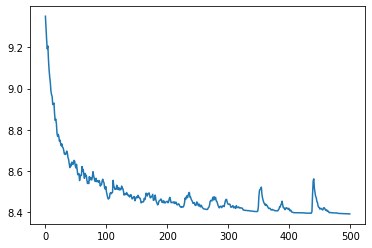

In [93]:
plt.plot(history.history['loss'])